In [86]:
#Import du dataset
import pandas as pd
df = pd.read_csv('used car dataset.csv', index_col=0)
df.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [2]:
#Exploration des types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 182.0+ KB


In [87]:
#Nombre de valeurs nulles
print(df.isna().sum().sum())
print(df.isna().sum())

13
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64


In [88]:
#Zoom sur les valeurs nulles
df[df[['mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)']].isna().any(axis=1)]

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
462,2022 BMW X3 xDrive30i M Sport,Feb-22,Zero Dep,Petrol,5,8450,First Owner,Automatic,2022,19.0,5.0,5.0,NaN,71.90
513,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
533,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
589,2011 Toyota Etios G,Jul-11,Comprehensive,Petrol,5,54214,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.55


In [89]:
#Suppression des lignes précédentes
df.loc[df['car_name'] == '2011 Toyota Etios G', 'engine(cc)'] = df.loc[df['car_name'] == '2011 Toyota Etios G', 'engine(cc)'].fillna(1496)
df.loc[df['car_name'] == '2011 Toyota Etios G', 'mileage(kmpl)'] = df.loc[df['car_name'] == '2011 Toyota Etios G', 'mileage(kmpl)'].fillna(16.78)
df.loc[df['car_name'] == '2011 Toyota Etios G', 'max_power(bhp)'] = df.loc[df['car_name'] == '2011 Toyota Etios G', 'max_power(bhp)'].fillna(88)
df.loc[df['car_name'] == '2011 Toyota Etios G', 'torque(Nm)'] = df.loc[df['car_name'] == '2011 Toyota Etios G', 'torque(Nm)'].fillna(132)
df.loc[df['car_name'] == '2022 BMW X3 xDrive30i M Sport', 'torque(Nm)'] = df.loc[df['car_name'] == '2022 BMW X3 xDrive30i M Sport', 'torque(Nm)'].fillna(350)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1553 non-null   float64
 10  engine(cc)          1553 non-null   float64
 11  max_power(bhp)      1553 non-null   float64
 12  torque(Nm)          1553 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 182.0+ KB


In [90]:
#supprime registration inutile
df=df.drop('registration_year', axis=1)

In [8]:
df.head()

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [91]:
df.duplicated().sum().sum()

421

In [92]:
#Affichage des doublons
df.loc[df.duplicated]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
40,2021 MG Gloster Savvy 6-Str,Comprehensive,Diesel,6,35000,First Owner,Automatic,2021,12.40,1996.0,1996.0,21501.0,35.00
41,2010 Maruti Swift 1.2 VXi BSII,Comprehensive,Petrol,5,100525,First Owner,Manual,2010,16.10,1197.0,1197.0,85.0,2.09
42,2015 Honda City i VTEC CVT VX,Third Party insurance,Petrol,5,83000,Second Owner,Automatic,2015,18.00,1497.0,1497.0,1173.0,6.25
43,2011 Maruti Wagon R LXI BSIII,Comprehensive,Petrol,5,40191,Second Owner,Manual,2011,998.00,671.0,671.0,90.0,2.12
44,2015 Audi A6 35 TDI,Comprehensive,Diesel,5,62152,First Owner,Automatic,2015,18.53,1968.0,1968.0,18774.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2013 Hyundai i10 Sportz,Comprehensive,Petrol,5,1800,First Owner,Manual,2013,20.36,1197.0,1197.0,789.0,3.15
1510,2019 Jeep Compass 1.4 Limited Plus BSIV,Comprehensive,Petrol,5,34000,First Owner,Automatic,2019,16.00,1368.0,1368.0,16077.0,17.50
1511,2021 Toyota Urban cruiser Premium AT,Zero Dep,Petrol,5,30000,First Owner,Automatic,2021,18.76,1462.0,1462.0,10326.0,11.40
1512,2018 Hyundai Grand i10 Sportz,Comprehensive,Petrol,5,22700,First Owner,Manual,2018,18.90,1197.0,1197.0,8186.0,5.45


In [93]:
#Suppression des doublons
df=df.drop_duplicates(keep='first')

In [94]:
df.info()
print("isna", df.isna().sum().sum())
print("duplicated",df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1132 non-null   object 
 1   insurance_validity  1132 non-null   object 
 2   fuel_type           1132 non-null   object 
 3   seats               1132 non-null   int64  
 4   kms_driven          1132 non-null   int64  
 5   ownsership          1132 non-null   object 
 6   transmission        1132 non-null   object 
 7   manufacturing_year  1132 non-null   object 
 8   mileage(kmpl)       1132 non-null   float64
 9   engine(cc)          1132 non-null   float64
 10  max_power(bhp)      1132 non-null   float64
 11  torque(Nm)          1132 non-null   float64
 12  price(in lakhs)     1132 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 123.8+ KB
isna 0
duplicated 0


In [13]:
df.head()

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [95]:
#Eclatement du car name pour récupérer année, marque et type de voiture
df[['year', 'brand', 'car_type']] = df['car_name'].str.split(n=2, expand=True)
df.head()

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),year,brand,car_type
0,2017 Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,2017,Mercedes-Benz,S-Class S400
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,2020,Nissan,Magnite Turbo CVT XV Premium Opt BSVI
2,2018 BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2018,BMW,X1 sDrive 20d xLine
3,2019 Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,2019,Kia,Seltos GTX Plus
4,2019 Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,2019,Skoda,Superb LK 1.8 TSI AT


In [96]:
#supprime colonnes car_name et year inutiles
df=df.drop(['year', 'car_name'], axis=1)

In [97]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz,S-Class S400
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW,X1 sDrive 20d xLine
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda,Superb LK 1.8 TSI AT


In [17]:
#Exploratory
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1132.000000,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1.132000e+03,1132.00000
mean,64.375442,53135.610424,220.878993,1.151609e+10,1.151609e+10,1.439752e+04,159.51629
std,1991.214057,43105.253572,557.021333,1.934489e+11,1.934489e+11,9.543038e+04,3505.29986
min,4.000000,620.000000,7.810000,5.000000e+00,5.000000e+00,5.000000e+00,1.00000
25%,5.000000,30000.000000,16.550000,1.197000e+03,1.197000e+03,4.175000e+02,4.50000
50%,5.000000,49000.000000,18.900000,1.461000e+03,1.461000e+03,1.174500e+03,6.75000
75%,5.000000,70000.000000,22.350000,1.991000e+03,1.991000e+03,8.850000e+03,14.91250
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.00000


In [98]:
#Modes de brand
df['brand'].value_counts()

Maruti           254
Hyundai          240
Honda            130
Mercedes-Benz     97
BMW               61
Toyota            48
Audi              40
Tata              38
Mahindra          33
Ford              25
Volkswagen        22
Kia               22
Renault           21
Nissan            17
Land              14
MG                14
Skoda             11
Jeep              11
Volvo             10
Jaguar             6
Datsun             4
Mitsubishi         3
Lexus              3
Isuzu              2
Porsche            2
Mini               2
Fiat               1
Lamborghini        1
Name: brand, dtype: int64

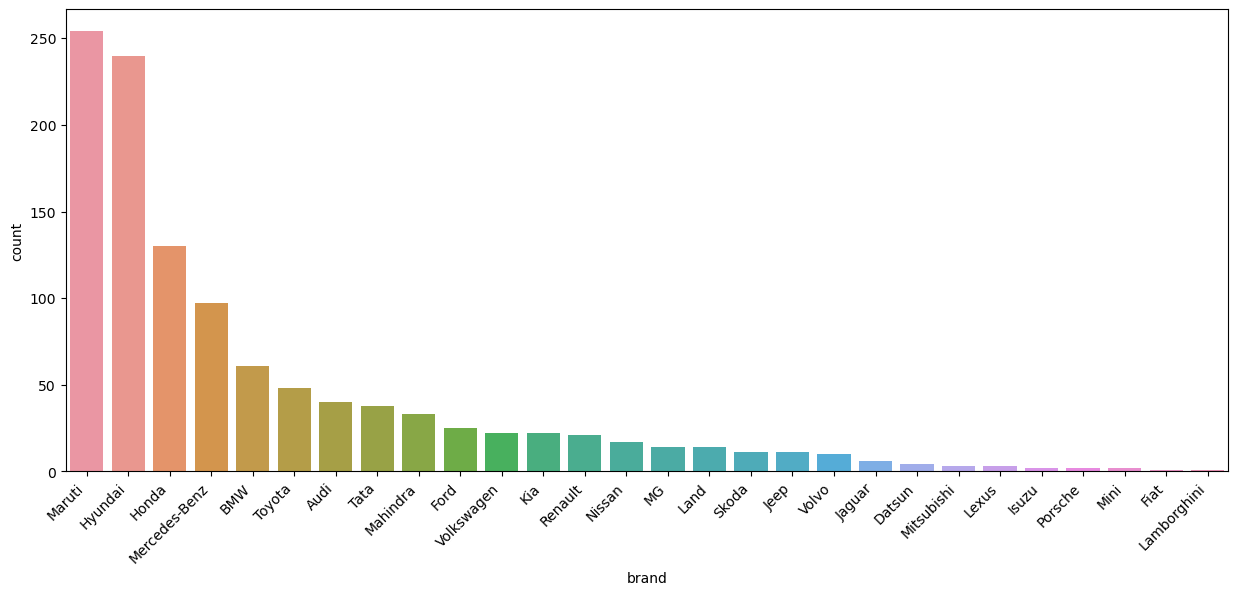

In [99]:
#Graphique des brand
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig = plt.figure(figsize=(15,6))
df_sorted = df['brand'].value_counts().sort_values(ascending=False).reset_index()
df_sorted.columns = ['brand', 'count']
df_sorted

ax = sns.barplot(x='brand', y='count', data=df_sorted)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


#ax=sns.countplot(x=df_sorted.brand)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#plt.show

In [100]:
#Mapping des pays constructeurs
brand_country_map = {
    'Maruti': 'India',
    'Hyundai': 'South Korea',
    'Honda': 'Japan',
    'Mercedes-Benz': 'Germany',
    'Toyota': 'Japan',
    'BMW': 'Germany',
    'Tata': 'India',
    'Audi': 'Germany',
    'Mahindra': 'India',
    'Ford': 'United States',
    'Renault': 'France',
    'Volkswagen': 'Germany',
    'Kia': 'South Korea',
    'Nissan': 'Japan',
    'Skoda': 'Czech Republic',
    'Jeep': 'United States',
    'MG': 'United Kingdom',
    'Volvo': 'Sweden',
    'Jaguar': 'United Kingdom',
    'Land': 'United Kingdom',
    'Datsun': 'Japan',
    'Mitsubishi': 'Japan',
    'Porsche': 'Germany',
    'Mini': 'United Kingdom',
    'Isuzu': 'Japan',
    'Lexus': 'Japan',
    'Fiat': 'Italy',
    'Lamborghini': 'Italy'
}

df['origin_country'] = df['brand'].map(brand_country_map)
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz,S-Class S400,Germany
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW,X1 sDrive 20d xLine,Germany
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda,Superb LK 1.8 TSI AT,Czech Republic


<Axes: xlabel='origin_country', ylabel='count'>

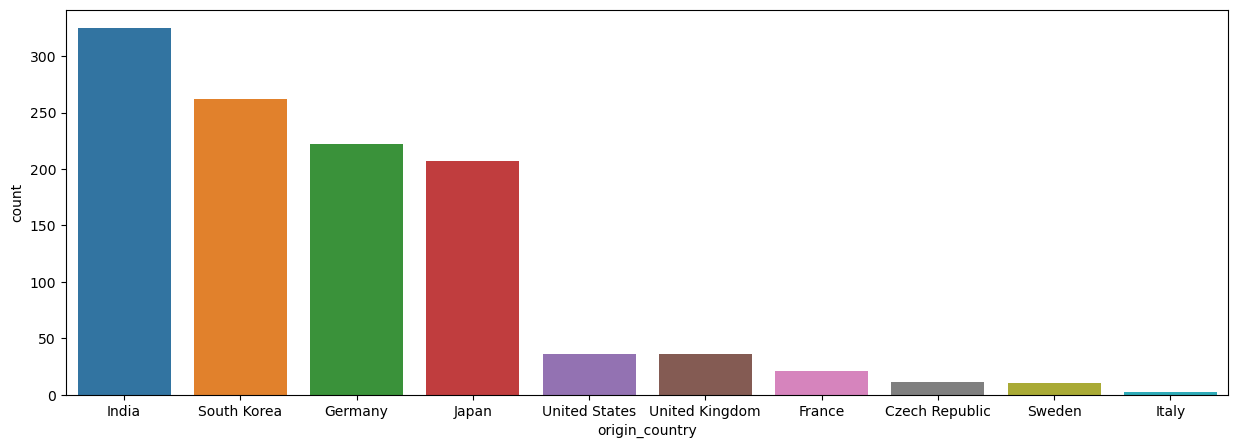

In [101]:
#Graphique Pays
plt.figure(figsize=(15,5))
counts = df['origin_country'].value_counts().sort_values(ascending=False)
sns.countplot(x=df.origin_country, order=counts.index)


<Figure size 2500x500 with 0 Axes>

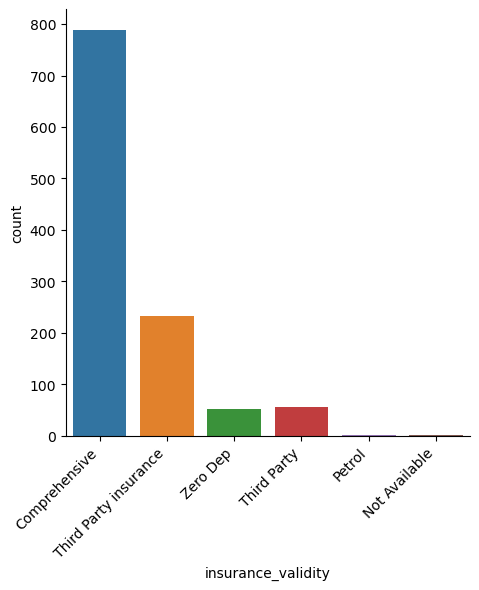

In [102]:
#Graphique Pays'insurance_validity' column:
plt.figure(figsize=(25,5))
ax1 = sns.catplot(x='insurance_validity', kind="count", data=df);
ax1.set_xticklabels(rotation=45, ha='right')

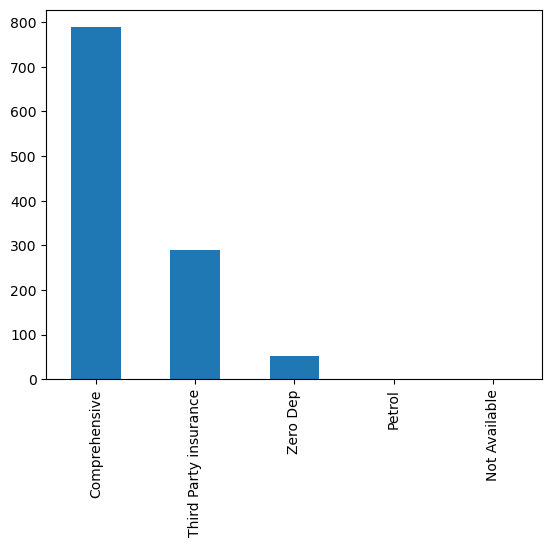

In [103]:
# replace the values od the 'insurance_validity' columns:
df['insurance_validity'] = df['insurance_validity'].replace('Third Party','Third Party insurance')
df['insurance_validity'].value_counts().plot(kind='bar')
plt.show()

In [104]:
#Suppression des lignes avec valeurs fausses sur insurance
df.loc[df['insurance_validity'] == 'Petrol']
df = df.loc[df['insurance_validity'] != 'Petrol']
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz,S-Class S400,Germany
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW,X1 sDrive 20d xLine,Germany
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda,Superb LK 1.8 TSI AT,Czech Republic


<Figure size 2500x500 with 0 Axes>

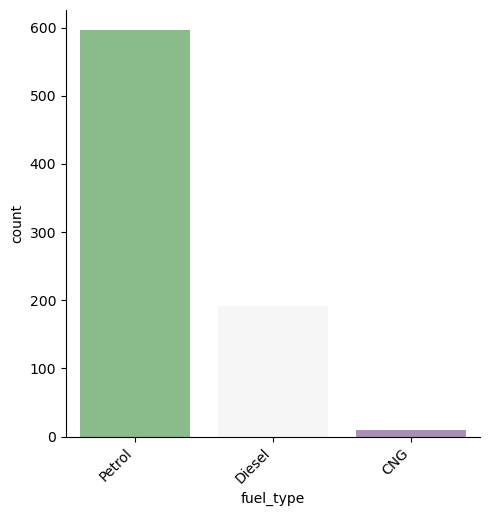

In [146]:
# check the values of 'fuel' column:
plt.figure(figsize=(25,5))
ax2 = sns.catplot(x='fuel_type', kind="count", data=df, palette="PRGn_r");
ax2.set_xticklabels(rotation=45, ha='right')

In [106]:
df[df['insurance_validity']=="Not Available"]

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
946,Not Available,Petrol,5,92762,Fifth Owner,Automatic,2009,10.13,3498.0,3498.0,3649.0,8.25,Mercedes-Benz,S-Class S 350 L,Germany


In [107]:
#Suppresion ligne inutile
df.drop(946, inplace=True)

C:\Users\Davsor\AppData\Local\Temp\ipykernel_18312\2912258635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(946, inplace=True)


<Axes: xlabel='seats', ylabel='count'>

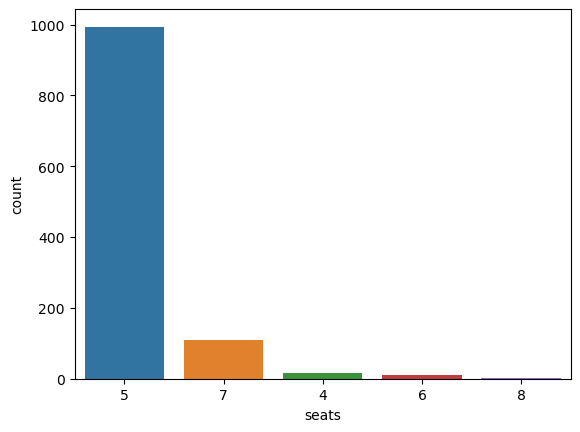

In [108]:
# check the values of 'seats' column:

#plt.figure(figsize=(25,5))
#ax2 = sns.catplot(x='seats', kind="count", data=df, palette="PRGn_r");
#ax2.set_xticklabels(rotation=45, ha='right')

counts = df['seats'].value_counts().sort_values(ascending=False)
sns.countplot(x=df.seats, order=counts.index)

#df['seats'].value_counts().plot(kind="bar")
#plt.show()

Text(0.5, 1.0, 'Distribution des kms driven')

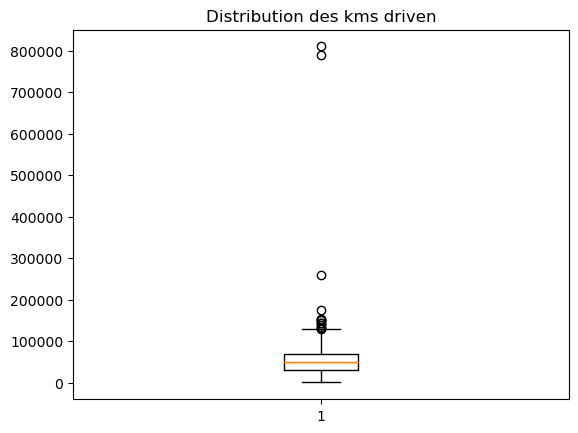

In [109]:
#Graphique kms driven
plt.boxplot([df.kms_driven])
plt.title('Distribution des kms driven')


In [110]:
df[df['kms_driven']>200000]
#3 lines are outliers

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
1094,Zero Dep,Petrol,5,790000,First Owner,Automatic,2020,18.15,998.0,998.0,11835.0,9.75,Hyundai,Venue SX Plus Turbo DCT,South Korea
1131,Comprehensive,Diesel,5,810000,First Owner,Manual,2020,21.70,1498.0,1498.0,9896.0,9.00,Ford,Ecosport 1.5 Diesel Titanium,United States
1420,Comprehensive,Diesel,7,260000,First Owner,Manual,2012,12.80,2494.0,2494.0,102.0,6.25,Toyota,Innova 2.5 VX 7 STR BSIV,Japan


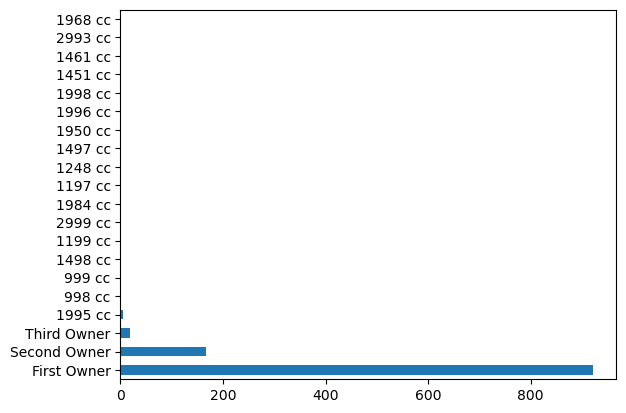

In [111]:
#Graphique ownsership
df['ownsership'].value_counts().plot(kind='barh')
plt.show()

In [112]:
own_corrupted= df[~df['ownsership'].isin(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner'])]
own_corrupted
df.loc[~df['ownsership'].isin(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner']), 'ownsership'] = 'Unknown'

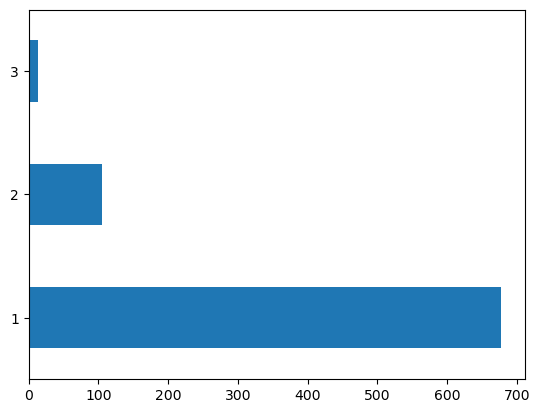

In [149]:
#df=df.drop(own_corrupted.index)
df['ownsership'].value_counts().plot(kind='barh')
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   insurance_validity  1130 non-null   object 
 1   fuel_type           1130 non-null   object 
 2   seats               1130 non-null   int64  
 3   kms_driven          1130 non-null   int64  
 4   ownsership          1130 non-null   object 
 5   transmission        1130 non-null   object 
 6   manufacturing_year  1130 non-null   object 
 7   mileage(kmpl)       1130 non-null   float64
 8   engine(cc)          1130 non-null   float64
 9   max_power(bhp)      1130 non-null   float64
 10  torque(Nm)          1130 non-null   float64
 11  price(in lakhs)     1130 non-null   float64
 12  brand               1130 non-null   object 
 13  car_type            1130 non-null   object 
 14  origin_country      1130 non-null   object 
dtypes: float64(5), int64(2), object(8)
memory usage: 141.2+

<Axes: xlabel='transmission', ylabel='count'>

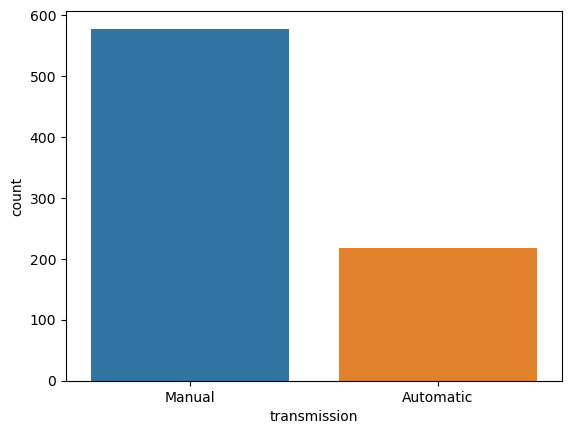

In [147]:
#Graphique transmission
counts = df['transmission'].value_counts().sort_values(ascending=False)
sns.countplot(x=df.transmission, order=counts.index)

In [116]:
trans_corrupted= df[~df['transmission'].isin(['Manual', 'Automatic'])]
trans_corrupted

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
116,Third Party insurance,Diesel,5,60000,Unknown,2017,Power Steering,2993.00,26149.0,26149.0,620.0,55.00,BMW,7 Series 730Ld M Sport,Germany
170,Third Party insurance,Diesel,5,100000,Unknown,2014,Power Steering,1461.00,1085.0,1085.0,248.0,6.00,Nissan,Terrano XV 110 PS Limited Edition,Japan
210,Third Party insurance,Petrol,5,10000,Unknown,2023,Power Steering,998.00,11841.0,11841.0,172.0,11.70,Hyundai,i20 N-Line N8 DCT BSVI,South Korea
213,Third Party insurance,Diesel,5,30000,Unknown,2017,Power Steering,1995.00,188.0,188.0,400.0,19.50,BMW,X1 sDrive20d Expedition,Germany
228,Third Party insurance,Petrol,6,20000,Unknown,2020,Power Windows Front,1451.00,141.0,141.0,250.0,17.50,MG,Hector Plus Smart DCT,United Kingdom
231,Third Party insurance,Diesel,5,32000,Unknown,2017,Power Steering,1995.00,188.0,188.0,400.0,18.20,BMW,X1 sDrive20d Expedition,Germany
269,Third Party insurance,Diesel,5,32000,Unknown,2017,Power Steering,1995.00,188.0,188.0,400.0,19.50,BMW,X1 sDrive20d Expedition,Germany
272,Third Party insurance,Petrol,4,40000,Unknown,2021,Power Steering,1998.00,18740.0,18740.0,280.0,32.00,BMW,2 Series Black Shadow Edition,Germany
361,Third Party insurance,Diesel,5,80000,Unknown,2014,Power Steering,1498.00,986.0,986.0,200.0,4.75,Honda,City i DTEC V,Japan
367,Third Party insurance,Petrol,5,110000,Unknown,2011,Power Steering,1497.00,1186600.0,1186600.0,1464800.0,3.50,Honda,City 1.5 S MT,Japan


In [117]:
df=df.drop(trans_corrupted.index)

In [118]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz,S-Class S400,Germany
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW,X1 sDrive 20d xLine,Germany
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda,Superb LK 1.8 TSI AT,Czech Republic


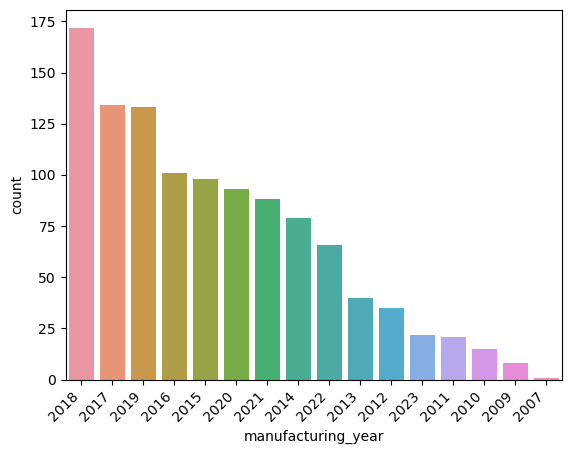

In [119]:
#Graphique manufacturing year
counts = df['manufacturing_year'].value_counts().sort_values(ascending=False)
sns.countplot(x=df.manufacturing_year, order=counts.index, orient="h")
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.0, 'Distribution des mileage(kmpl)')

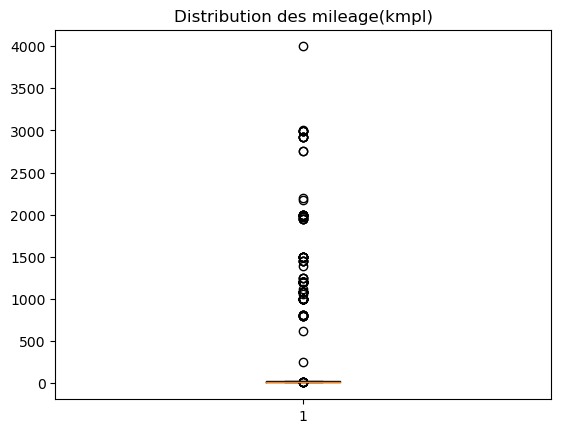

In [120]:
#Graphique mileage
plt.boxplot([df['mileage(kmpl)']])
plt.title('Distribution des mileage(kmpl)')

Text(0.5, 1.0, 'Distribution des engine(cc)')

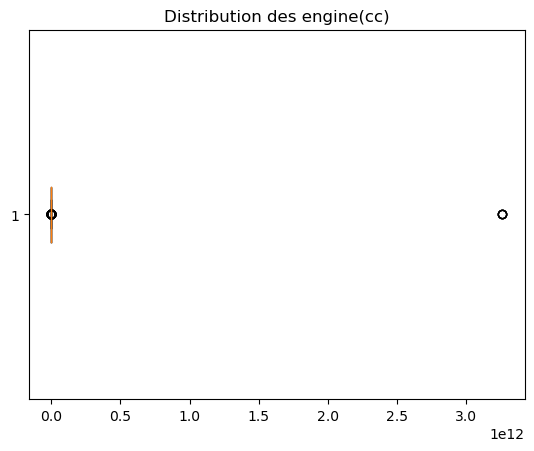

In [121]:
#Graphique Engine
plt.boxplot([df['engine(cc)']], vert=False)
plt.title('Distribution des engine(cc)')

In [122]:
#On zoome les outliers
values=df['engine(cc)'].unique()
sorted_values = sorted(values, reverse=True)
print(sorted_values)
df[(df['engine(cc)']>10000)] #& (df['car_type']=='GLE 300d BSVI')]

[3258640000000.0, 1652243800.0, 38487.0, 36207.0, 30173.0, 28161.0, 24138.0, 20115.0, 19713.0, 18774.0, 18740.0, 18238.0, 15287.0, 12873.0, 11345.0, 11343.0, 9863.0, 8877.0, 8850.0, 8580.0, 8180.0, 7394.0, 6805.0, 6706.0, 6705.0, 6704.0, 5833.0, 5461.0, 4733.0, 4663.0, 4036.0, 3982.0, 3748.0, 3604.0, 3456.0, 3198.0, 2999.0, 2998.0, 2996.0, 2995.0, 2993.0, 2987.0, 2982.0, 2979.0, 2967.0, 2925.0, 2755.0, 2694.0, 2523.0, 2494.0, 2454.0, 2400.0, 2393.0, 2360.0, 2199.0, 2198.0, 2179.0, 2157.0, 2143.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1991.0, 1984.0, 1969.0, 1968.0, 1956.0, 1950.0, 1896.0, 1799.0, 1798.0, 1797.0, 1796.0, 1598.0, 1595.0, 1591.0, 1586.0, 1582.0, 1499.0, 1498.0, 1497.0, 1496.0, 1493.0, 1462.0, 1461.0, 1451.0, 1396.0, 1395.0, 1373.0, 1368.0, 1364.0, 1353.0, 1298.0, 1248.0, 1199.0, 1198.0, 1197.0, 1194.0, 1186.0, 1173.0, 1120.0, 1086.0, 1047.0, 999.0, 998.0, 986.0, 887.0, 831.0, 814.0, 799.0, 796.0, 789.0, 671.0, 641.0, 552.0, 463.0, 370.0, 342.0, 340.0, 200.0, 190.0, 141.

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
79,Third Party insurance,Diesel,7,62000,Second Owner,Manual,2018,2179.0,1.528700e+04,1.528700e+04,360.0,8.50,Mahindra,XUV500 W5,India
142,Zero Dep,Diesel,5,33000,First Owner,Automatic,2020,1950.0,2.413800e+04,2.413800e+04,500.0,78.00,Mercedes-Benz,GLE 300d BSVI,Germany
145,Zero Dep,Diesel,5,43703,First Owner,Automatic,2022,1950.0,2.413800e+04,2.413800e+04,500.0,82.90,Mercedes-Benz,GLE 300d BSVI,Germany
146,Comprehensive,Diesel,7,29800,First Owner,Automatic,2021,2755.0,2.011500e+04,2.011500e+04,500.0,44.00,Toyota,Fortuner Legender 4x2 AT,Japan
160,Comprehensive,Petrol,5,30000,First Owner,Automatic,2019,2996.0,3.848700e+04,3.848700e+04,520.0,67.00,Mercedes-Benz,AMG C43 4MATIC Coupe,Germany
162,Comprehensive,Petrol,7,25000,First Owner,Automatic,2021,1999.0,1.971300e+04,1.971300e+04,380.0,24.75,Mahindra,XUV700 AX7 AT Luxury Pack BSVI,India
175,Zero Dep,Petrol,5,16433,First Owner,Automatic,2022,1969.0,1.874000e+04,1.874000e+04,300.0,43.75,Volvo,XC40 T4 R-Design,Sweden
313,Comprehensive,Petrol,5,28000,First Owner,Automatic,2021,1984.0,1.877400e+04,1.877400e+04,320.0,26.50,Audi,Q2 Premium Plus I,Germany
396,Comprehensive,Petrol,5,16000,First Owner,Automatic,2022,2996.0,3.848700e+04,3.848700e+04,520.0,83.00,Mercedes-Benz,AMG GLC 43 4MATIC Coupe,Germany
454,Third Party insurance,Petrol,5,9500,First Owner,Automatic,2022,1991.0,3.017300e+04,3.017300e+04,400.0,56.50,Mercedes-Benz,AMG GLA 35 4MATIC,Germany


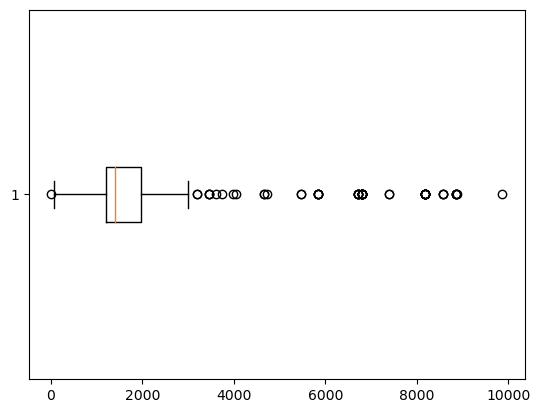

In [123]:
df=df.drop(df[(df['engine(cc)']>10000)].index)
countengine=df['engine(cc)']
plt.boxplot(countengine, vert=False)
plt.show()

In [124]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
0,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz,S-Class S400,Germany
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
2,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW,X1 sDrive 20d xLine,Germany
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
4,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda,Superb LK 1.8 TSI AT,Czech Republic


In [125]:
#mise à jour du type de manufacturing year en integer
df['manufacturing_year']=df['manufacturing_year'].astype('int64')

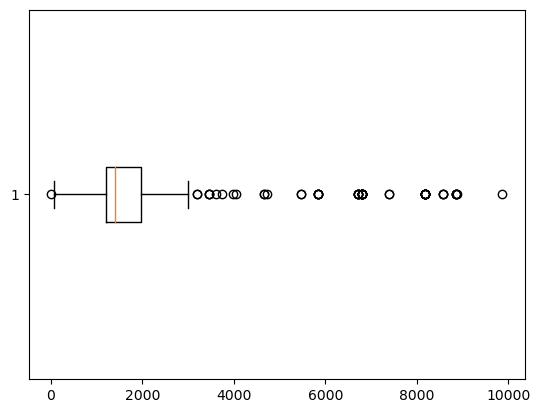

array([2.996e+03, 9.990e+02, 1.995e+03, 1.353e+03, 1.798e+03, 1.199e+03,
       1.197e+03, 1.591e+03, 2.987e+03, 1.198e+03, 1.497e+03, 1.498e+03,
       9.980e+02, 1.368e+03, 1.996e+03, 6.710e+02, 1.968e+03, 1.496e+03,
       2.982e+03, 1.999e+03, 1.956e+03, 1.582e+03, 9.860e+02, 1.984e+03,
       1.997e+03, 1.493e+03, 1.950e+03, 2.179e+03, 1.998e+03, 5.833e+03,
       1.248e+03, 2.494e+03, 2.143e+03, 2.755e+03, 1.451e+03, 7.990e+02,
       8.180e+03, 6.805e+03, 2.000e+02, 1.991e+03, 1.461e+03, 7.000e+01,
       2.925e+03, 1.598e+03, 8.200e+01, 4.663e+03, 3.198e+03, 2.694e+03,
       1.047e+03, 2.157e+03, 1.462e+03, 1.373e+03, 2.199e+03, 9.863e+03,
       6.706e+03, 1.969e+03, 1.595e+03, 2.393e+03, 1.797e+03, 2.967e+03,
       2.999e+03, 1.396e+03, 2.995e+03, 2.998e+03, 2.360e+03, 2.993e+03,
       1.173e+03, 1.499e+03, 5.000e+00, 4.630e+02, 1.410e+02, 8.800e+01,
       1.086e+03, 6.704e+03, 3.982e+03, 8.850e+03, 3.604e+03, 5.461e+03,
       8.877e+03, 3.456e+03, 2.198e+03, 1.395e+03, 

In [126]:
#Graphique max_power
countmaxpowerbhp=df['max_power(bhp)']
plt.boxplot(countmaxpowerbhp,vert=False)
plt.show()

df['max_power(bhp)'].unique()

In [127]:
df_sorted = df.sort_values(by='max_power(bhp)', ascending=False)
df=df.drop(df[(df['max_power(bhp)']>3000)].index)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   insurance_validity  1022 non-null   object 
 1   fuel_type           1022 non-null   object 
 2   seats               1022 non-null   int64  
 3   kms_driven          1022 non-null   int64  
 4   ownsership          1022 non-null   object 
 5   transmission        1022 non-null   object 
 6   manufacturing_year  1022 non-null   int64  
 7   mileage(kmpl)       1022 non-null   float64
 8   engine(cc)          1022 non-null   float64
 9   max_power(bhp)      1022 non-null   float64
 10  torque(Nm)          1022 non-null   float64
 11  price(in lakhs)     1022 non-null   float64
 12  brand               1022 non-null   object 
 13  car_type            1022 non-null   object 
 14  origin_country      1022 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 127.8+

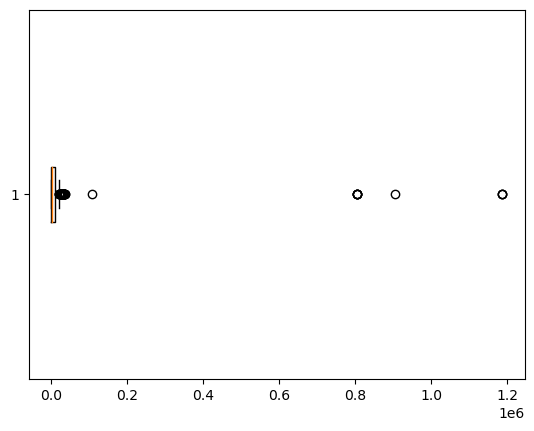

array([3.33000e+02, 9.86300e+03, 1.88000e+02, 1.38080e+04, 1.77460e+04,
       8.87000e+02, 8.18600e+03, 1.21300e+03, 2.54790e+04, 1.08500e+03,
       1.17600e+03, 1.04550e+04, 1.84000e+02, 1.18350e+04, 8.18000e+03,
       1.90000e+02, 1.21360e+04, 1.60770e+04, 2.15010e+04, 8.50000e+01,
       1.17300e+03, 9.00000e+01, 1.87740e+04, 8.31000e+02, 1.05940e+04,
       1.68500e+03, 1.77000e+02, 1.70000e+02, 8.85000e+03, 1.26200e+03,
       8.67000e+02, 7.20000e+01, 2.00000e+02, 1.14400e+03, 1.19350e+04,
       1.51890e+04, 1.13430e+04, 2.01150e+04, 1.36780e+04, 1.38000e+02,
       1.05500e+03, 2.48080e+04, 6.70000e+01, 2.54800e+03, 8.20000e+01,
       7.39000e+02, 7.89000e+02, 1.57700e+03, 1.18410e+04, 1.40000e+02,
       1.34100e+03, 1.71500e+03, 1.41000e+02, 1.20000e+02, 8.68300e+03,
       1.38050e+04, 5.33000e+02, 1.89080e+04, 8.48200e+03, 2.04000e+02,
       3.80000e+02, 1.18360e+04, 1.94000e+02, 9.89600e+03, 8.18300e+03,
       1.13400e+03, 1.83000e+02, 6.61000e+02, 1.04500e+03, 1.084

In [129]:
#Graphique torque
counts=df['torque(Nm)']
plt.boxplot(counts,vert=False)
plt.show()

df['torque(Nm)'].unique()

In [130]:
df=df.drop(df[(df['torque(Nm)']>15000)].index)

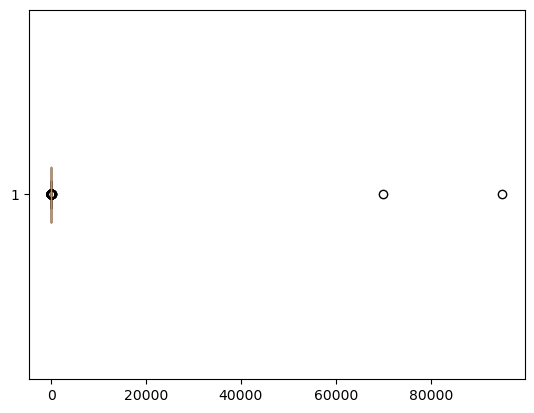

In [131]:
#Graphique Price
counts=df['price(in lakhs)']
plt.boxplot(counts,vert=False)
plt.show()

In [132]:
df=df.drop(df[(df['price(in lakhs)']>20)].index)

In [133]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
1,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.4,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
3,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.5,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
5,Third Party insurance,Petrol,5,42000,First Owner,Manual,2017,18.7,1199.0,1199.0,887.0,5.45,Honda,Jazz 1.2 S i VTEC,Japan
6,Comprehensive,Petrol,5,36739,First Owner,Manual,2018,18.9,1197.0,1197.0,8186.0,5.12,Hyundai,Grand i10 1.2 Kappa Sportz BSIV,South Korea
7,Comprehensive,Petrol,5,76000,First Owner,Manual,2018,15.8,1591.0,1591.0,1213.0,9.30,Hyundai,Creta 1.6 SX,South Korea


In [135]:
#Encoding le ownership

df.ownsership=df['ownsership'].replace({"First Owner": 1, "Second Owner": 2, "Third Owner": 3})
df.rename(columns={'ownsership': 'ownership'}, inplace=True)

In [137]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),brand,car_type,origin_country
1,Comprehensive,Petrol,5,30615,1,Automatic,2020,17.4,999.0,999.0,9863.0,8.99,Nissan,Magnite Turbo CVT XV Premium Opt BSVI,Japan
3,Comprehensive,Petrol,5,18378,1,Manual,2019,16.5,1353.0,1353.0,13808.0,13.56,Kia,Seltos GTX Plus,South Korea
5,Third Party insurance,Petrol,5,42000,1,Manual,2017,18.7,1199.0,1199.0,887.0,5.45,Honda,Jazz 1.2 S i VTEC,Japan
6,Comprehensive,Petrol,5,36739,1,Manual,2018,18.9,1197.0,1197.0,8186.0,5.12,Hyundai,Grand i10 1.2 Kappa Sportz BSIV,South Korea
7,Comprehensive,Petrol,5,76000,1,Manual,2018,15.8,1591.0,1591.0,1213.0,9.30,Hyundai,Creta 1.6 SX,South Korea


In [153]:
#Suppression du brand et car type qui ne seront pas utiles dans l'apprentissage
df=df.drop(columns={'brand', "car_type"})
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),origin_country
1,Comprehensive,Petrol,5,30615,1,Automatic,2020,17.4,999.0,999.0,9863.0,8.99,Japan
3,Comprehensive,Petrol,5,18378,1,Manual,2019,16.5,1353.0,1353.0,13808.0,13.56,South Korea
5,Third Party insurance,Petrol,5,42000,1,Manual,2017,18.7,1199.0,1199.0,887.0,5.45,Japan
6,Comprehensive,Petrol,5,36739,1,Manual,2018,18.9,1197.0,1197.0,8186.0,5.12,South Korea
7,Comprehensive,Petrol,5,76000,1,Manual,2018,15.8,1591.0,1591.0,1213.0,9.30,South Korea


In [154]:
#séparation des variables explicatives et de la variable cible
feats = df.drop("price(in lakhs)", axis=1)
target = df["price(in lakhs)"]

In [210]:
#séparation des variables numériques et catégorielles

num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(exclude=['int64', 'float64']).columns

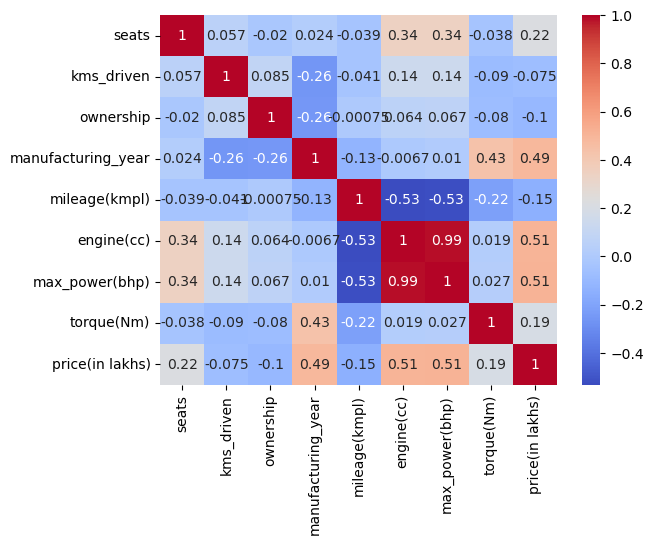

<Figure size 1500x1500 with 0 Axes>

In [211]:
# check the correlation between the price and all numeric features:
corr_matrix = df[num_col].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.figure(figsize=(15,15))
plt.show()

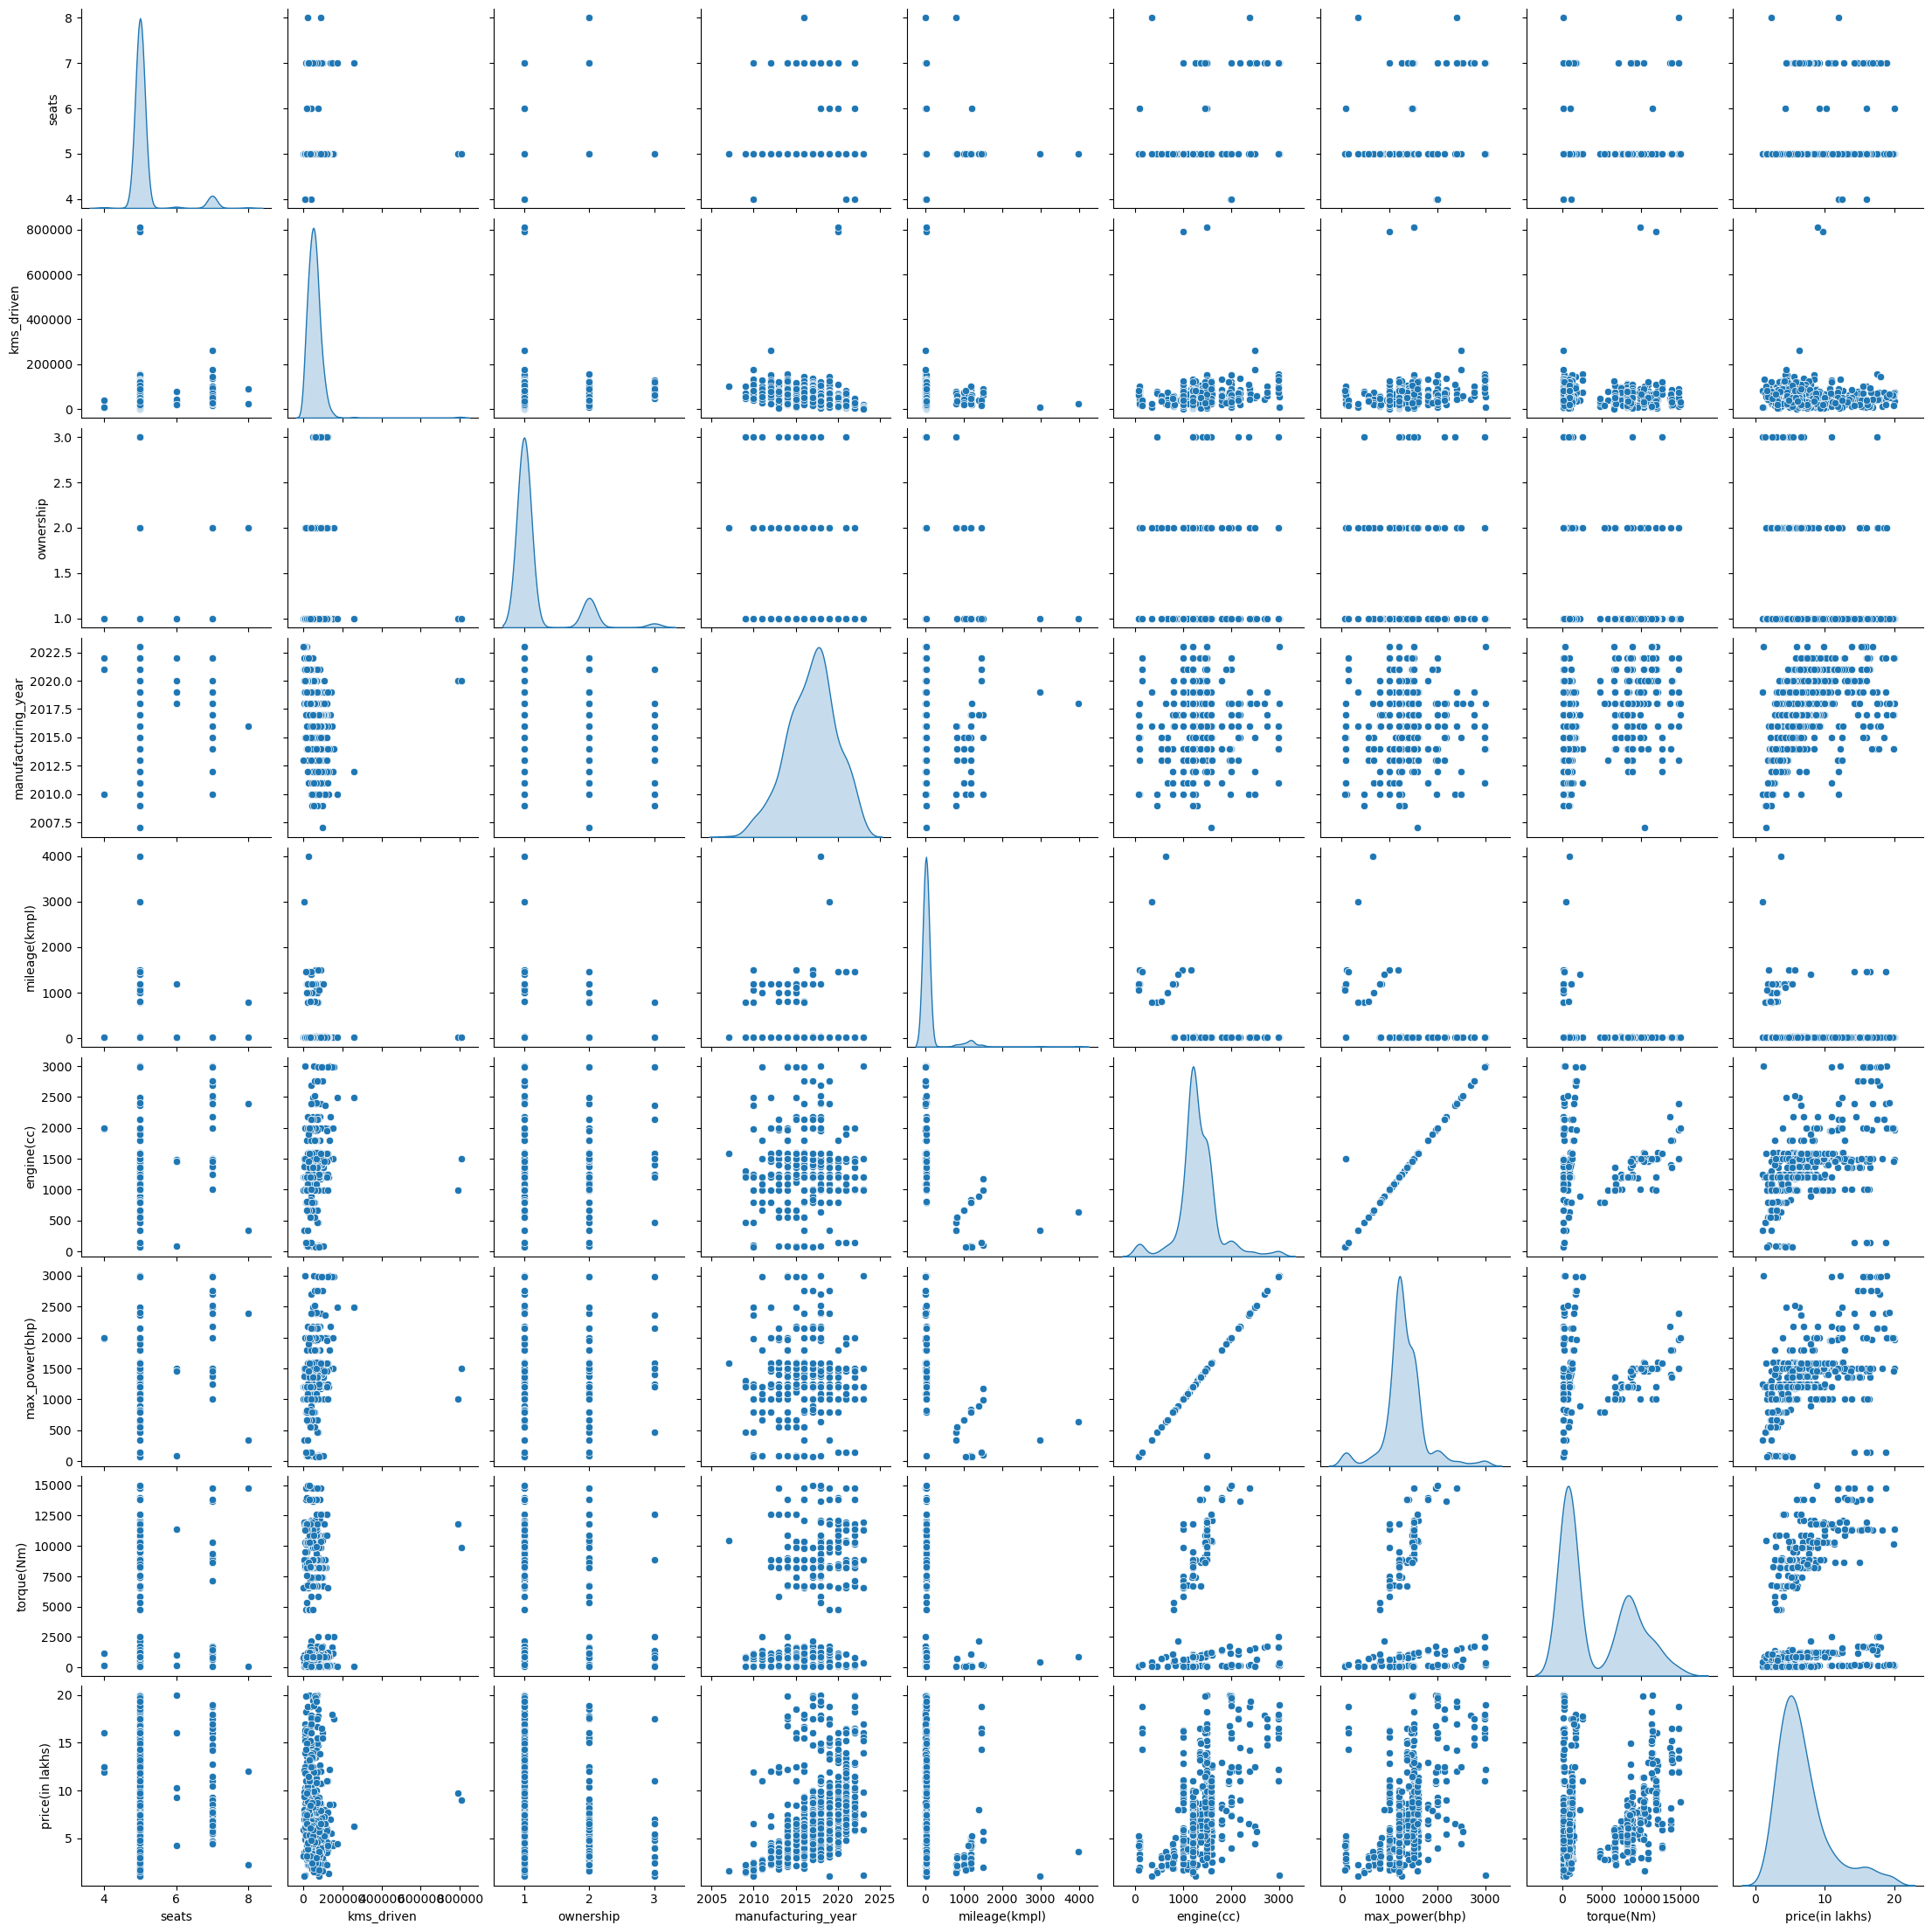

In [170]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [241]:
#séparation des données en jeu entraînement et jeu test
from sklearn.model_selection import train_test_split

# Séparation en jeu de train (80%) et jeu de test (20%)
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=42)

In [242]:
# Séparation jeu d'entraînement
num_train = X_train.select_dtypes(include='number')
cat_train = X_train.select_dtypes(include='object')

# Séparation jeu de test
num_test = X_rest.select_dtypes(include='number')
cat_test = X_rest.select_dtypes(include='object')

In [243]:
from sklearn.preprocessing import OneHotEncoder
# Le paramètre drop = 'first' permet de supprimer l'une des colonnes créée par le OneHotEncoder
# et donc d'éviter un problème de multicolinéarité
oneh = OneHotEncoder(drop = 'first', sparse=False)
cat_train_encoded =oneh.fit_transform(cat_train)
cat_test_encoded =oneh.transform(cat_test)
# Créer des DataFrames à partir des tableaux one-hot encodés
cat_train_encoded_df = pd.DataFrame(cat_train_encoded, columns=oneh.get_feature_names_out(), index=cat_train.index)
cat_test_encoded_df = pd.DataFrame(cat_test_encoded, columns=oneh.get_feature_names_out(), index=cat_test.index)
cat_train_encoded_df

C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,insurance_validity_Third Party insurance,insurance_validity_Zero Dep,fuel_type_Diesel,fuel_type_Petrol,transmission_Manual,origin_country_France,origin_country_Germany,origin_country_India,origin_country_Italy,origin_country_Japan,origin_country_South Korea,origin_country_Sweden,origin_country_United Kingdom,origin_country_United States
695,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1103,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
878,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
702,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
# Concat
X_train = pd.concat([num_train, cat_train_encoded_df], axis=1)
X_test = pd.concat([num_test, cat_test_encoded_df], axis=1)

In [245]:
X_train

,seats,kms_driven,ownership,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),insurance_validity_Third Party insurance,insurance_validity_Zero Dep,...,transmission_Manual,origin_country_France,origin_country_Germany,origin_country_India,origin_country_Italy,origin_country_Japan,origin_country_South Korea,origin_country_Sweden,origin_country_United Kingdom,origin_country_United States
695,5,100000,2,2012,16.80,1497.0,1497.0,1163.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1103,5,20000,1,2021,21.79,998.0,998.0,6705.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
878,5,83000,1,2016,14.80,1595.0,1595.0,12069.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1156,5,76792,1,2016,20.73,1373.0,1373.0,911.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,5,23000,1,2018,18.90,1197.0,1197.0,8186.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,5,62700,1,2016,18.60,1197.0,1197.0,8183.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280,5,30466,1,2021,20.28,998.0,998.0,11841.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
702,5,97610,1,2018,28.40,1248.0,1248.0,7402.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1097,5,57647,1,2019,24.70,796.0,796.0,473.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
#Standardisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [246]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

#Instanciation du modele
dt_reg = DecisionTreeRegressor()

#Entrainement du modele 
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [238]:
print("score train : " , dt_reg.score(X_train, y_train))
print("score test : ", dt_reg.score(X_test,y_test))

score train :  0.9999999941988752
score test :  0.7914632600978575


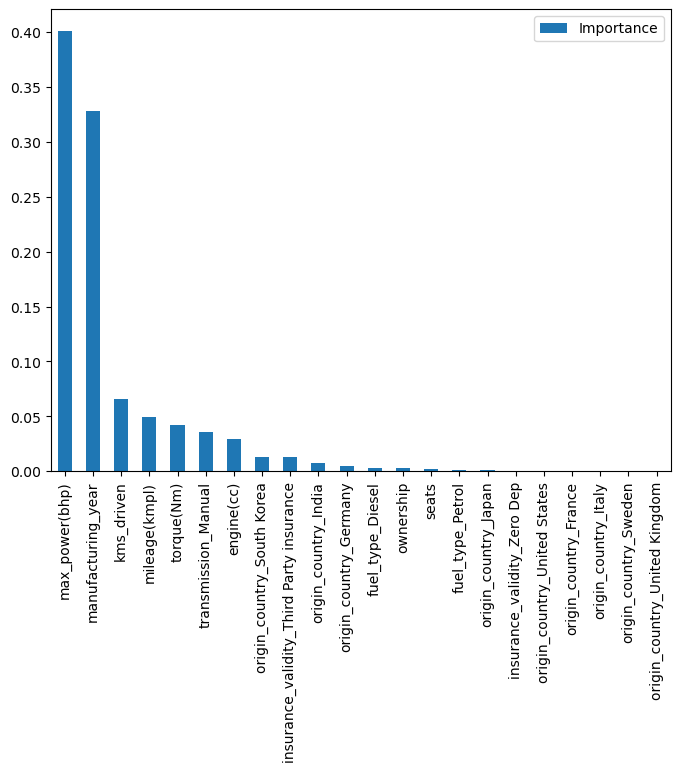

In [247]:
# Assurez-vous que feats a toutes les colonnes nécessaires après le One-Hot Encoding
feats_encoded = pd.get_dummies(feats)
feats_encoded = feats_encoded.reindex(columns=X_train.columns, fill_value=0)

# Créer la DataFrame feat_importances
feat_importances = pd.DataFrame(dt_reg.feature_importances_, index=feats_encoded.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Visualiser l'importance des fonctionnalités
feat_importances.plot(kind='bar', figsize=(8, 6))
plt.show()

In [250]:
#Calcul des MAE
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### DecisionTree

regressor_decision_tree = DecisionTreeRegressor(random_state=42) 
  
regressor_decision_tree.fit(X_train, y_train)


y_pred_decision_tree = regressor_decision_tree.predict(X_test)
y_pred_train_decision_tree = regressor_decision_tree.predict(X_train)

# Calcul des métriques

# jeu d'entraînement
mae_decision_tree_train = mean_absolute_error(y_train,y_pred_train_decision_tree)
mse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=True)
rmse_decision_tree_train = mean_squared_error(y_train,y_pred_train_decision_tree,squared=False)

# jeu de test 
mae_decision_tree_test = mean_absolute_error(y_test,y_pred_decision_tree)
mse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=True)
rmse_decision_tree_test = mean_squared_error(y_test,y_pred_decision_tree,squared=False)

# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data = {'MAE train': [mae_decision_tree_train],
        'MAE test': [mae_decision_tree_test],
        'MSE train': [mse_decision_tree_train],
        'MSE test': [mse_decision_tree_test],
        'RMSE train': [rmse_decision_tree_train],
        'RMSE test': [rmse_decision_tree_test]}
  
# Creer DataFrame
df = pd.DataFrame(data, index = ['Decision Tree'])

df.head()


,MAE train,MAE test,MSE train,MSE test,RMSE train,RMSE test
Decision Tree,0.000016,1.131,7.861635e-08,3.412204,0.00028,1.847215


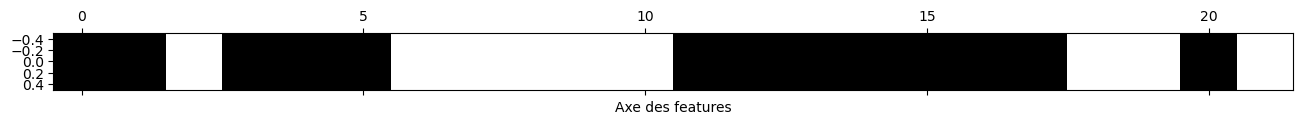

In [196]:
# Etude du RFE (pour réduire le nombre de paramètres)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lm = LinearRegression()
rfe = RFE(estimator=lm, step=1, n_features_to_select = 13)
rfe.fit(X_train, y_train)

mask = rfe.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');


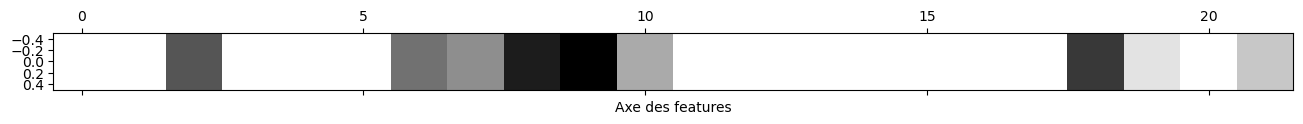

In [197]:
ranking = rfe.ranking_
plt.matshow(ranking.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');
plt.show();


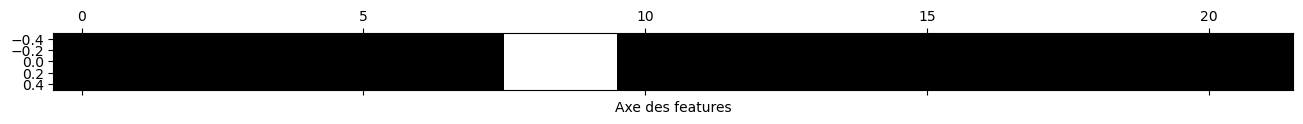

In [198]:
crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)
rfecv = RFECV(estimator=lm, cv = crossval, step=1)
rfecv.fit(X_train, y_train)

mask = rfecv.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Axe des features');
plt.show();

In [200]:
#plt.plot(rfecv.grid_scores_);
print("Nombre de features retenues :", rfecv.n_features_)


Nombre de features retenues : 20


In [202]:
#Entrainement du modele 
lm.fit(X_train, y_train)
print("score train : " , lm.score(X_train, y_train))
print("score test : ", lm.score(X_test,y_test))
#Les resultas en linearregression ne sont pas meilleurs que DecisionTree

score train :  0.6821789154583184
score test :  0.6973358248958448


In [221]:
#Optimisation des paramètres du DecisionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Définir les hyperparamètres à rechercher
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],  # Métrique de division des nœuds
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis à chaque feuille
}

# Instanciation du modèle DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

# Instanciation de GridSearchCV
grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='r2')

# Entraînement du modèle avec la recherche des meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Afficher le score sur le jeu de test avec les meilleurs hyperparamètres
best_dt_reg = grid_search.best_estimator_
print("Score sur le jeu de test avec meilleurs hyperparamètres :", best_dt_reg.score(X_test, y_test))

#Les résultats ne sont pas meilleurs.

Meilleurs hyperparamètres : {'criterion': 'friedman_mse', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
Score sur le jeu de test avec meilleurs hyperparamètres : 0.7882315211821126


C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Davsor\anaconda3\lib\site-packages\sklearn\base.p